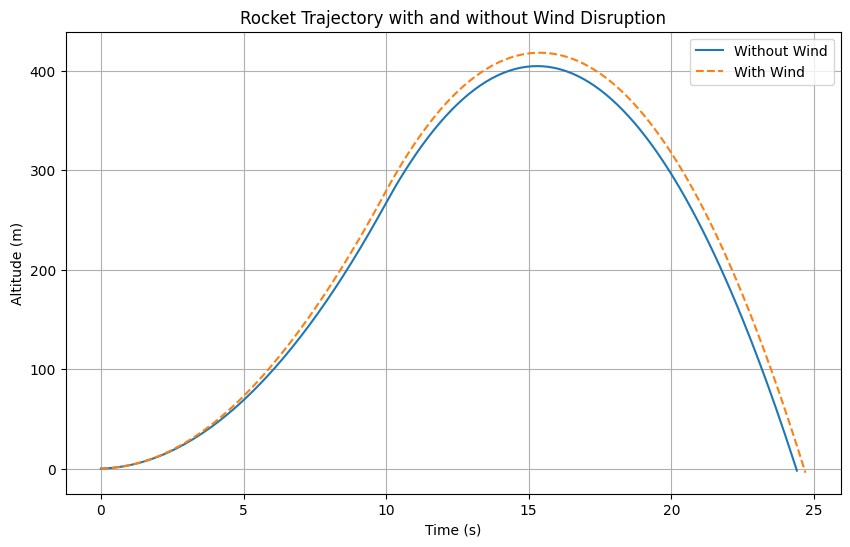

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravity (m/s^2)
mass = 1000  # mass of rocket in kg
thrust = 15000  # constant thrust force in N
burn_time = 10  # seconds
dt = 0.1  # time step

# Wind model: wind force varies sinusoidally with time
def wind_force(t):
    return 500 * np.sin(0.5 * t)  # in Newtons, positive or negative

def simulate_rocket(with_wind=False):
    t = 0
    v = 0  # initial velocity
    y = 0  # initial altitude
    times = []
    altitudes = []

    while y >= 0:
        if t < burn_time:
            thrust_force = thrust
        else:
            thrust_force = 0

        w_force = wind_force(t) if with_wind else 0
        # Total force = thrust + wind - weight
        F_net = thrust_force + w_force - mass * g

        # Acceleration
        a = F_net / mass

        # Update velocity and altitude
        v += a * dt
        y += v * dt

        # Record data
        times.append(t)
        altitudes.append(y)

        t += dt

        # Stop if rocket hits ground
        if y < 0:
            break

    return np.array(times), np.array(altitudes)

# Simulate without wind
t_no_wind, y_no_wind = simulate_rocket(with_wind=False)

# Simulate with wind
t_wind, y_wind = simulate_rocket(with_wind=True)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(t_no_wind, y_no_wind, label='Without Wind')
plt.plot(t_wind, y_wind, label='With Wind', linestyle='--')
plt.title('Rocket Trajectory with and without Wind Disruption')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.grid(True)
plt.show()
